This notebook is part of the "Literary Metaphor Detection
with LLM Fine-Tuning and Few-Shot Learning" paper. The corresponding repository can be found on [Github](https://github.com/ma-spie/LLM_metaphor_detection).

# Visualisation of the evaluation results

*goals of this notebook*:
* showing all evaluation results of the fine-tuned Transformers and fine-tuned SetFit models for all datasets
* comparing three methods (rule_based & statistical, Transformers, SetFit) on the metaphor detection task by illustrating the model performances

In [2]:
# imports
from google.colab import files    #only needed if Google colab is used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Upload csv files from the folders `setfit_training_output` and `transformers_training_output`

1.  four SetFit model results
  *   `setfit_evaluation_results_df_[datasetname].csv`
2.   four Transformers model results
  
  * `DistilBERT_evaluation_results_df_[datasetname].csv`
  

In [4]:
#data upload
uploaded_files = files.upload()    #only needed if Google colab is used, otherwis these files have to be in the same folder as this notebook

Saving setfit_evaluation_results_df_MOH.csv to setfit_evaluation_results_df_MOH.csv
Saving setfit_evaluation_results_df_PoFo.csv to setfit_evaluation_results_df_PoFo.csv
Saving setfit_evaluation_results_df_PoFo_TroFi_MOH.csv to setfit_evaluation_results_df_PoFo_TroFi_MOH.csv
Saving setfit_evaluation_results_df_TroFi.csv to setfit_evaluation_results_df_TroFi.csv


In [17]:
#load Transformers datasets
transformers_PoFo_df = pd.read_csv("DistilBERT_evaluation_results_df_PoFo_normalised.csv.csv", index_col=0, skiprows=1, names=["metric", "trans_PoFo"])
transformers_TroFi_df = pd.read_csv("DistilBERT_evaluation_results_df_TroFi_normalised.csv.csv", index_col=0, skiprows=1, names=["metric", "trans_TroFi"])
transformers_MOH_df = pd.read_csv("DistilBERT_evaluation_results_df_MOH-X_normalised.csv.csv", index_col=0, skiprows=1, names=["metric", "trans_MOH"])
transformers_all_df = pd.read_csv("DistilBERT_evaluation_results_df_PoFo_TroFi_MOH.csv.csv", index_col=0, skiprows=1, names=["metric", "trans_all"])

#load SetFit datasets
setfit_PoFo_df = pd.read_csv("setfit_evaluation_results_df_PoFo.csv", index_col=0, skiprows=1, names=["metric", "setfit_PoFo"])
setfit_TroFi_df = pd.read_csv("setfit_evaluation_results_df_TroFi.csv", index_col=0, skiprows=1, names=["metric", "setfit_TroFi"])
setfit_MOH_df = pd.read_csv("setfit_evaluation_results_df_MOH.csv", index_col=0, skiprows=1, names=["metric", "setfit_MOH"])
setfit_all_df = pd.read_csv("setfit_evaluation_results_df_PoFo_TroFi_MOH.csv", index_col=0, skiprows=1, names=["metric", "setfit_all"])

## full evaluation results

cretate one DataFrame for each method to see all evaluation results

In [18]:
#Transformers
transformers_method_df = pd.concat([transformers_PoFo_df, transformers_TroFi_df, transformers_MOH_df, transformers_all_df], axis=1)
transformers_method_df

,trans_PoFo,trans_TroFi,trans_MOH,trans_all
metric,,,,
eval_loss,0.648937,0.591485,0.491503,0.607064
eval_accuracy,0.648649,0.690707,0.775194,0.687500
eval_f1,0.688000,0.620102,0.785185,0.631450
eval_precision,0.597222,0.686792,0.803030,0.690860
eval_recall,0.811321,0.565217,0.768116,0.581448
eval_runtime,6.595400,5.723800,5.488300,5.586800
eval_samples_per_second,16.830000,125.966000,23.505000,171.834000
eval_steps_per_second,0.606000,4.018000,0.911000,5.370000
epoch,5.000000,5.000000,5.000000,5.000000


In [10]:
# SetFit
setfit_method_df = pd.concat([setfit_PoFo_df, setfit_TroFi_df, setfit_MOH_df, setfit_all_df], axis=1)
setfit_method_df

,setfit_PoFo,setfit_TroFi,setfit_MOH,setfit_all
metric,,,,
accuracy,0.720721,0.665742,0.736434,0.877083
precision,0.652778,0.614731,0.796610,0.889423
recall,0.886792,0.673913,0.681159,0.837104
f1,0.752000,0.642963,0.734375,0.862471


## F1 scores of all methods across all datasets

In [12]:
#baseline from Kesarwani et al.: rule-based and statistical method

f1_baseline = pd.DataFrame(
    {"base_PoFo": [0.669],
     "base_TroFi": [0.827],
     "base_MOH": [0.779],
     "base_all": [0.781]
     },
    index=["f1"]
)
f1_baseline

,base_PoFo,base_TroFi,base_MOH,base_all
f1,0.669,0.827,0.779,0.781


In [25]:
transformers_method_df.rename(index={"eval_f1": "f1"}, inplace=True)
transformers_method_df

,trans_PoFo,trans_TroFi,trans_MOH,trans_all
metric,,,,
eval_loss,0.648937,0.591485,0.491503,0.607064
eval_accuracy,0.648649,0.690707,0.775194,0.687500
f1,0.688000,0.620102,0.785185,0.631450
eval_precision,0.597222,0.686792,0.803030,0.690860
eval_recall,0.811321,0.565217,0.768116,0.581448
eval_runtime,6.595400,5.723800,5.488300,5.586800
eval_samples_per_second,16.830000,125.966000,23.505000,171.834000
eval_steps_per_second,0.606000,4.018000,0.911000,5.370000
epoch,5.000000,5.000000,5.000000,5.000000


In [26]:
#extract F1 values
f1_values_transformers = transformers_method_df.loc[transformers_method_df.index == "f1"]

f1_values_setfit = setfit_method_df.loc[setfit_method_df.index == "f1"]

In [37]:
#create F1 dataframe
f1_df = pd.concat([f1_baseline, f1_values_transformers, f1_values_setfit], axis=1)
f1_df

,base_PoFo,base_TroFi,base_MOH,base_all,trans_PoFo,trans_TroFi,trans_MOH,trans_all,setfit_PoFo,setfit_TroFi,setfit_MOH,setfit_all
f1,0.669,0.827,0.779,0.781,0.688,0.620102,0.785185,0.63145,0.752,0.642963,0.734375,0.862471


## F1 score visualisation

To visualise the evaluation results of the three approaches a bar plot is created for each approach.

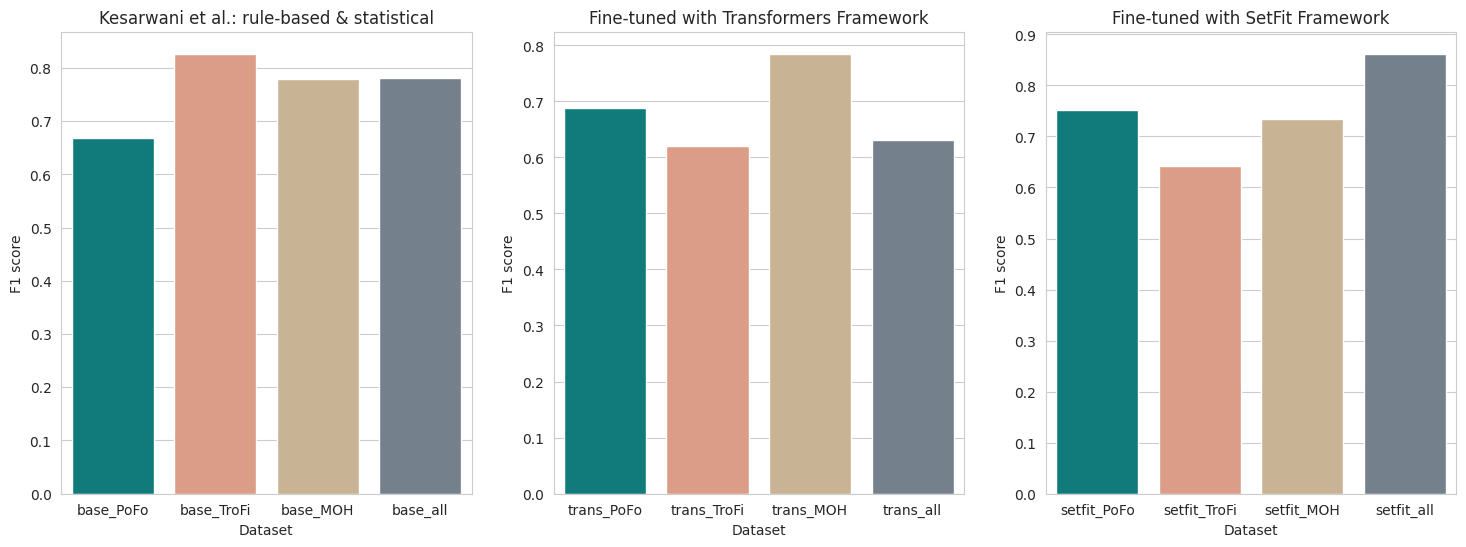

In [40]:
#three subplots: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html, https://seaborn.pydata.org/generated/seaborn.barplot.html

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.set_style("whitegrid")
sns.set_palette(["darkcyan","darksalmon","tan", "slategray"])

#Kesarwani et al., 2017: rule-based & statistical
sns.barplot(data=f1_baseline, ax=axs[0])
axs[0].set_title("Kesarwani et al.: rule-based & statistical")
axs[0].set_xlabel("Dataset")
axs[0].set_ylabel("F1 score")

# Transformers framework
sns.barplot(data=f1_df[["trans_PoFo", "trans_TroFi", "trans_MOH", "trans_all"]], ax=axs[1])
axs[1].set_title("Fine-tuned with Transformers Framework")
axs[1].set_xlabel("Dataset")
axs[1].set_ylabel("F1 score")

#SetFit framework
sns.barplot(data=f1_df[["setfit_PoFo", "setfit_TroFi", "setfit_MOH", "setfit_all"]], ax=axs[2])
axs[2].set_title("Fine-tuned with SetFit Framework")
axs[2].set_xlabel("Dataset")
axs[2].set_ylabel("F1 score")
axs[2].yaxis.set_major_locator(plt.MultipleLocator(0.1))       # set y ticks with 0.1 intervals to match the other subplots https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.MultipleLocator

plt.savefig("Evaluation_barplot.png")
plt.show()

# Works Cited

Kesarwani, Vaibhav, et al. “Metaphor Detection in a Poetry Corpus.” *Proceedings of the Joint SIGHUM Workshop on Computational Linguistics for Cultural Heritage, Social Sciences, Humanities and Literature, Vancouver, Canada*, edited by Beatrice Alex et al. Stroudsburg, PA, USA. Association for Computational Linguistics, pp. 1–9, [https://doi.org/10.18653/v1/W17-2201](https://doi.org/10.18653/v1/W17-2201).